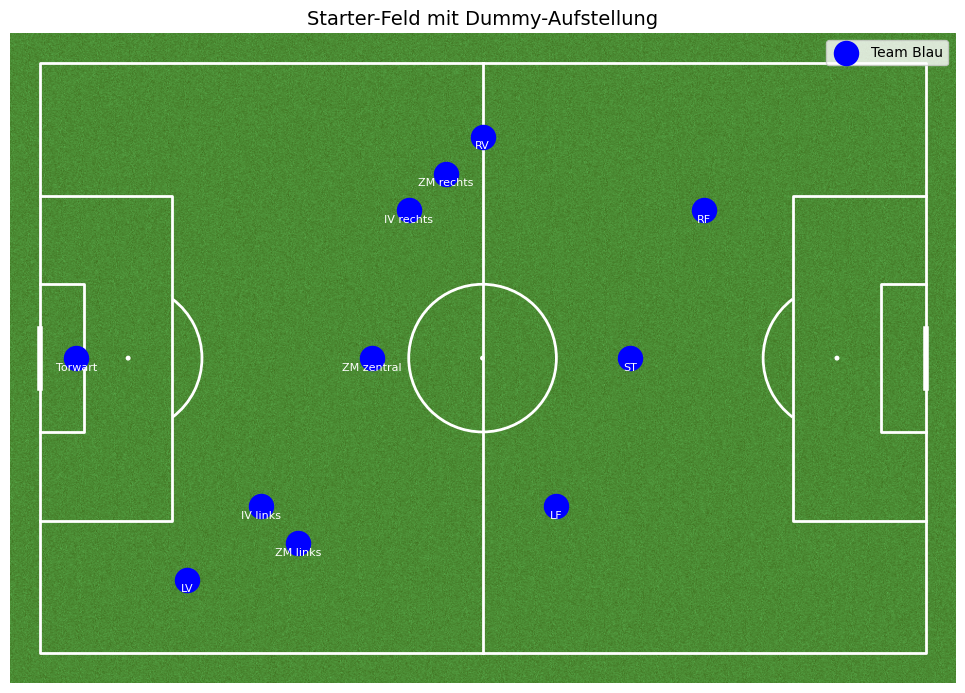

In [5]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch

# ⚽️ Spielfeld vorbereiten
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(figsize=(10, 7))

# 👥 Dummy-Spielerpositionen für ein Team (Koordinaten auf StatsBomb-Feld: 0–120 x, 0–80 y)
# z. B. eine typische 4-3-3-Aufstellung
players = pd.DataFrame({
    'player': ['Torwart', 'LV', 'IV links', 'IV rechts', 'RV', 
               'ZM links', 'ZM zentral', 'ZM rechts', 
               'LF', 'ST', 'RF'],
    'x': [5, 20, 30, 50, 60, 35, 45, 55, 70, 80, 90],
    'y': [40, 70, 60, 20, 10, 65, 40, 15, 60, 40, 20]
})

# 🖼️ Spieler auf dem Feld anzeigen
pitch.scatter(players['x'], players['y'], ax=ax, s=300, c='blue', label='Team Blau')

# 🏷️ Spielernamen anzeigen
for i, row in players.iterrows():
    ax.text(row['x'], row['y']+2, row['player'], ha='center', va='bottom', color='white', fontsize=8)

# 🧾 Plot zeigen
plt.title('Starter-Feld mit Dummy-Aufstellung', fontsize=14)
plt.legend()
plt.show()

# Dein statisches Original
original_players = players.copy()

# Dein "Workspace" für fortlaufende Änderungen
current_players = players.copy()




Hier ist nun der code um spielkerpositionen zu verändern:

In [32]:
def change_player_position(df, player_name, new_x, new_y):
    df2 = df.copy()
    if player_name not in df2['player'].values:
        print(f"❌ Spieler '{player_name}' nicht gefunden.")
        return df2
    df2.loc[df2['player'] == player_name, ['x', 'y']] = [new_x, new_y]
    return df2


# 🖼️ Neue Szene rendern mit geänderter Position
def plot_positions(original_df, modified_df, highlight_color="red"):
    pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
    fig, ax = pitch.draw(figsize=(10, 7))

    for _, mod_row in modified_df.iterrows():
        player = mod_row['player']
        orig_row = original_df[original_df['player'] == player]

        if orig_row.empty:
            continue

        orig_x, orig_y = orig_row.iloc[0]['x'], orig_row.iloc[0]['y']
        mod_x, mod_y = mod_row['x'], mod_row['y']

        changed = (mod_x != orig_x) or (mod_y != orig_y)

        if changed:
            # 🔹 alte Position (hellblau)
            pitch.scatter(orig_x, orig_y, ax=ax, s=300, c='lightblue')
            ax.text(orig_x, orig_y + 2, player, ha='center', va='bottom', color='white', fontsize=8)

            # 🔴 neue Position (rot)
            pitch.scatter(mod_x, mod_y, ax=ax, s=300, c=highlight_color)
            ax.text(mod_x, mod_y + 2, player, ha='center', va='bottom', color='yellow', fontsize=9, weight='bold')

        else:
            # 🔵 unveränderte Spieler (dunkelblau)
            pitch.scatter(mod_x, mod_y, ax=ax, s=300, c='darkblue')
            ax.text(mod_x, mod_y + 2, player, ha='center', va='bottom', color='white', fontsize=8)

    plt.title("Spielerpositionen: Original vs. Geändert", fontsize=14)
    plt.show()





# Funktion um die Ürsprungspositionen wieder herzustellen (mit bestätigungsabfrage)
def reset_positions_safe(confirm=True):
    if confirm:
        user_input = input("❗ Willst du wirklich alle Positionen zurücksetzen? (ja/nein): ")
        if user_input.lower() != 'ja':
            print("🔁 Reset abgebrochen.")
            return current_players
    print("✅ Positionen zurückgesetzt.")
    return original_players.copy()




Beisoiel code um die Position des Stürmers zu verändern

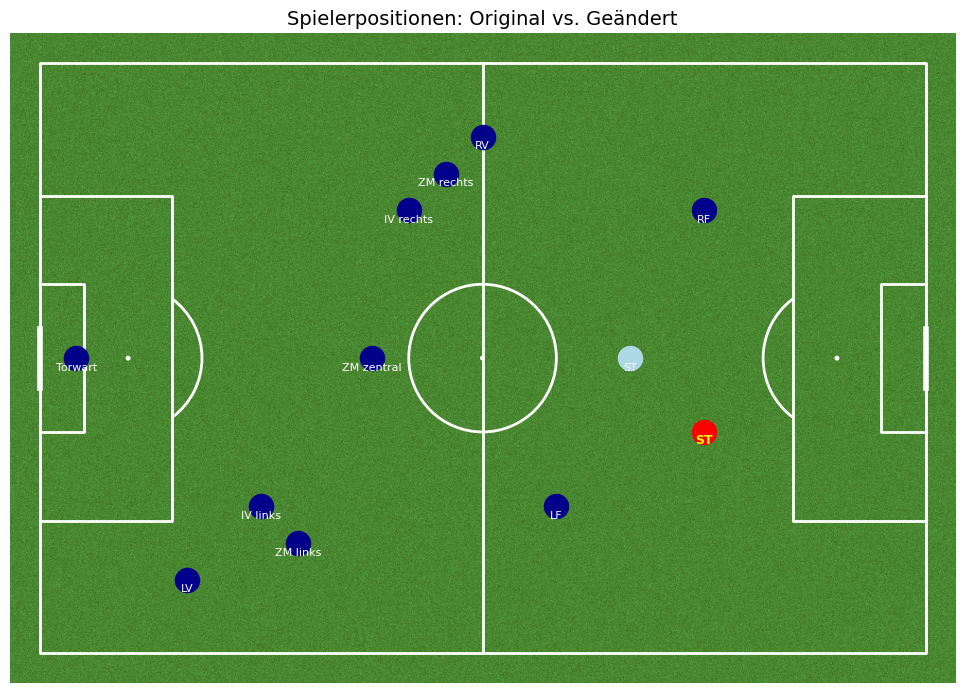

In [33]:
# 🔧 Beispiel: ST (Stürmer) verschieben
current_players = change_player_position(current_players, 'ST', 90, 50)

# 🖼️ Alte vs. neue Position anzeigen
plot_positions(players, current_players)


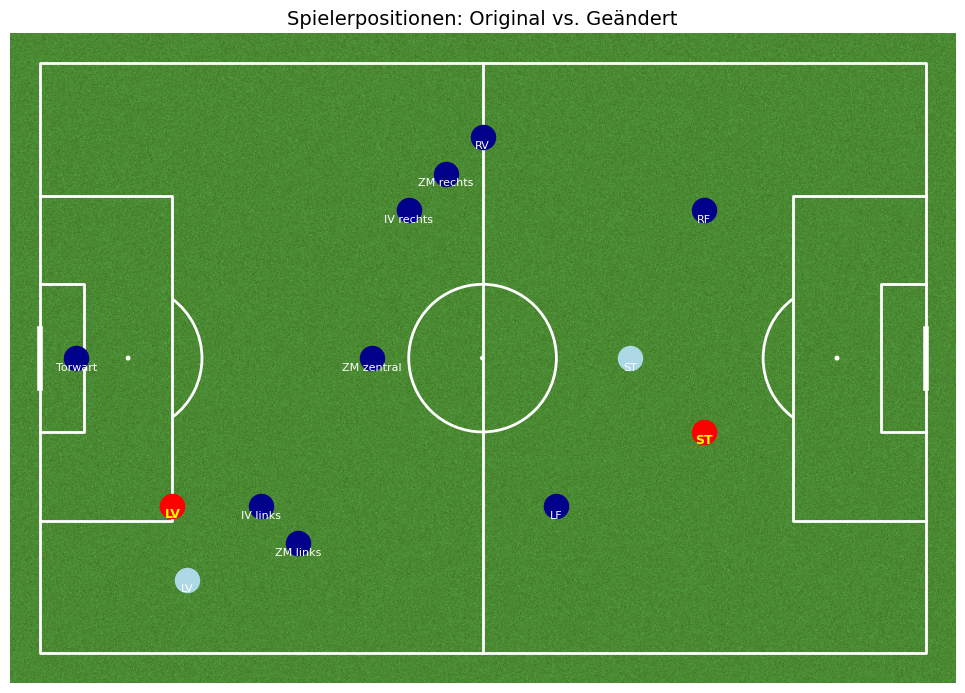

In [30]:
# Beispiel: LV (Linksverteidiger) leicht zurückziehen
current_players = change_player_position(current_players, 'LV', 18, 60)
plot_positions(players, current_players)


Ursprungspositionen wieder herstellen

✅ Positionen zurückgesetzt.


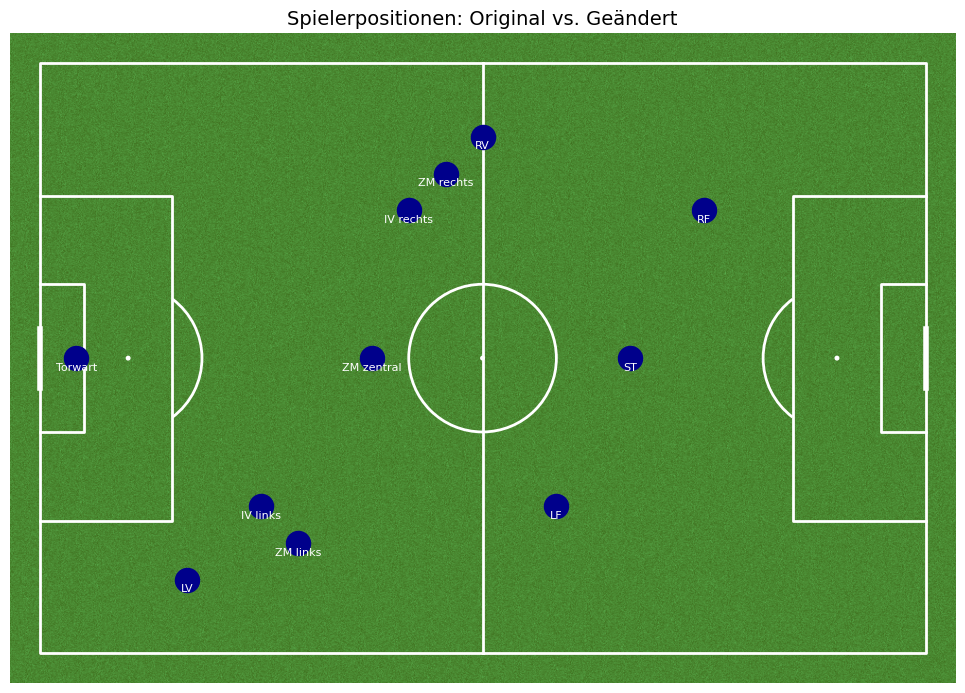

In [35]:
current_players = reset_positions_safe()
plot_positions(original_players, current_players)  # kein markierter Spieler
